In [33]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Visualize results of Data augmentation

In [1]:
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle as pkl
import itertools

In [2]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation'
pdDataAug=pkl.load(open(os.path.join(sRoot, 'pdTestResults.p'),'rb'))
pdDataAug2=pkl.load(open(os.path.join(sRoot, 'pdTestResults_50k.p'),'rb'))
pdDataAug3=pkl.load(open(os.path.join(sRoot, 'pdTestResults_100k.p'),'rb'))
pdDataAug=pd.concat([pdDataAug, pdDataAug2, pdDataAug3])

In [3]:
#pdDataAug=pd.DataFrame.from_csv(os.path.join(sRoot, 'TimeseriesAugmentation.csv'), index_col=None)
pdDataAug.loc[pdDataAug['Which']=='Standard', 'Augmentation Method'] = 'None'
pdDataAug['Noise']=pdDataAug[['Noise in timeseries', 'Noise in components']].apply(tuple, axis=1)

pdDataAug.loc[pdDataAug['Noise']==(0,0), 'Noise'] = 'None'
pdDataAug.loc[pdDataAug['Noise']==(1,0), 'Noise'] = 'Timeseries'
pdDataAug.loc[pdDataAug['Noise']==(0,1), 'Noise'] = 'Components'
pdDataAug.loc[pdDataAug['Noise']==(1,1), 'Noise'] = 'Both'

pdDataAug.loc[pdDataAug['Noise in timeseries']==0, 'Noise in timeseries'] = 'None'
pdDataAug.loc[pdDataAug['Noise in timeseries']==1, 'Noise in timeseries'] = 'Present'
pdDataAug.loc[pdDataAug['Noise in components']==0, 'Noise in components'] = 'None'
pdDataAug.loc[pdDataAug['Noise in components']==1, 'Noise in components'] = 'Present'

pdDataAug=pdDataAug.drop(columns=['Which'])
pdDataAug['Generalization Error Te']=pdDataAug['Validation AUC ROC']-pdDataAug['Test AUC ROC']

In [12]:
pdDataAug['Windowed']=0
pdDataAug.columns

Index(['Augmentation Method', 'Noise in timeseries', 'Noise in components',
       'Number of additional samples', 'Train AUC ROC', 'Train std. error',
       'Validation AUC ROC', 'Validation std. error', 'Test AUC ROC',
       'Generalization Error', 'Noise', 'Generalization Error Te', 'Windowed'],
      dtype='object')

In [19]:
import numpy as np

In [24]:
for sCol in pdDataAug.columns:
    print(f'{sCol}: ', np.unique(pdDataAug[sCol].values), '\n')

Augmentation Method:  ['ICA' 'None' 'PCA'] 

Noise in timeseries:  ['None' 'Present'] 

Noise in components:  ['None' 'Present'] 

Number of additional samples:  [     0.   1000.   2000.  10000.  20000.  50000. 100000.] 

Train AUC ROC:  [0.98146028 0.98208453 0.98373175 0.98378053 0.98525143 0.98563075
 0.98564206 0.98580435 0.98582652 0.98596989 0.98617338 0.98647771
 0.98666891 0.98686711 0.98715324 0.98738007 0.98749358 0.98841727
 0.98880813 0.9888424  0.98884686 0.98887117 0.98906916 0.98911799
 0.98974227 0.99013823 0.9905793  0.99063008 0.9908389  0.99085273
 0.9918359  0.9920464  0.99264729 0.99265072 0.992911   0.9930995
 0.99361604 0.99426601 0.99764416] 

Train std. error:  [0.00000000e+00 1.11022302e-16 1.32804529e-05 2.69391053e-05
 3.18078801e-05 4.30365270e-05 1.95941070e-04 1.98032840e-04
 2.12654211e-04 2.25140699e-04 2.29753412e-04 2.33547268e-04
 2.40936313e-04 2.69839213e-04 3.00088475e-04 3.16520191e-04
 3.25519702e-04 3.39166344e-04 3.78098518e-04 4.26675715e-04


In [30]:
pdWindowedResults=pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation/pdWindowedTestResults.p','rb'))

In [31]:
pdDataAug=pd.concat([pdDataAug, pdWindowedResults])

In [32]:
pkl.dump(pdDataAug, open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation/pdViolinPlotReadyData.p','wb'))

In [4]:
lsColumns=list(pdDataAug.columns[3:10])
lsColumns.append('Generalization Error Te')
lsColumns

['Number of additional samples',
 'Train AUC ROC',
 'Train std. error',
 'Validation AUC ROC',
 'Validation std. error',
 'Test AUC ROC',
 'Generalization Error',
 'Generalization Error Te']

In [35]:
for sColumn in lsColumns:
    pdDataAug[sColumn]=pdDataAug[sColumn].astype(float)

In [36]:
def fPlot(pdData, sX, sY, sHue):
    if sHue is None:
        sTag=''
    else:
        sTag=f' Colored by {sHue.title()}'
    plt.title("\n".join(wrap(f'{sY} by {sX}{sTag}')))
    if (sX=='Number of additional samples' and sHue=='Noise'):
        sns.scatterplot(x=sX, y=sY, hue=sHue, data=pdDataAug)
    else:
        sns.violinplot(x=sX, y=sY, hue=sHue, data=pdDataAug)
    sEmpty=''
    if sHue is None:
        sHue='NA'
    plt.savefig(os.path.join(sRoot, 'Images', f'{sY.title().replace(" ","")}By{sX.title().replace(" ","")}CodedWith{sHue.title().replace(" ","")}.png'))
    plt.close()

In [311]:
lsX=['Augmentation Method', 'Number of additional samples']
lsY=['Generalization Error', 'Generalization Error Te', 'Train AUC ROC','Validation AUC ROC','Test AUC ROC']
lsHues=[None,'Augmentation Method','Noise in timeseries','Noise in components','Noise']

In [312]:
lsAllCombos=list(itertools.product(*[lsX, lsY, lsHues]))

In [39]:
for (sX, sY, sHue) in lsAllCombos:
    if sX!=sHue:
        print(f'X:{sX}\nY:{sY}\nHue:{sHue}')
        fPlot(pdDataAug, sX, sY, sHue)
    else:
        pass

NameError: name 'lsAllCombos' is not defined

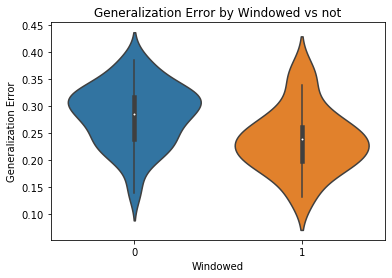

In [37]:
plt.title("\n".join(wrap('Generalization Error by Windowed vs not')))
sns.violinplot(x='Windowed', y='Generalization Error', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByWindowed_v2.png'))

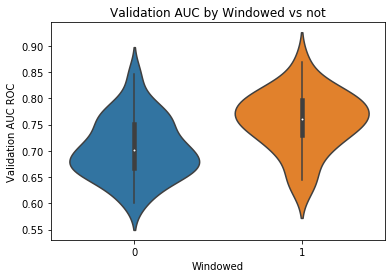

In [42]:
plt.title("\n".join(wrap('Validation AUC by Windowed vs not')))
sns.violinplot(x='Windowed', y='Validation AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationAUCByWindowed_v2.png'))

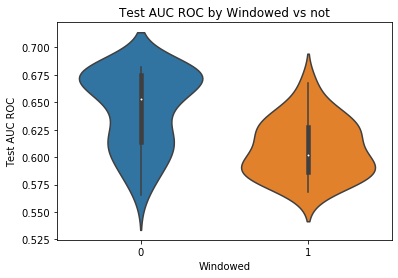

In [43]:
plt.title("\n".join(wrap('Test AUC ROC by Windowed vs not')))
sns.violinplot(x='Windowed', y='Test AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestAUCByWindowed_v2.png'))

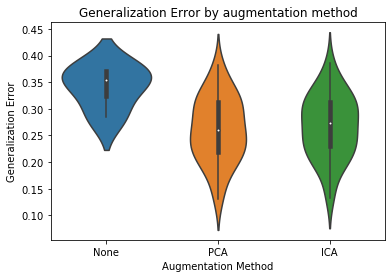

In [60]:
plt.title("\n".join(wrap('Generalization Error by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Generalization Error', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByAug_v2.png'))

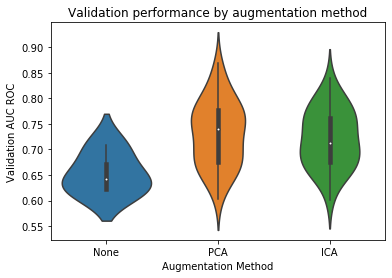

In [59]:
plt.title("\n".join(wrap('Validation performance by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Validation AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByAug_v2.png'))

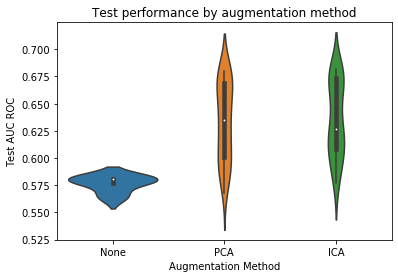

In [58]:
plt.title("\n".join(wrap('Test performance by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Test AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByAug_v2.png'))

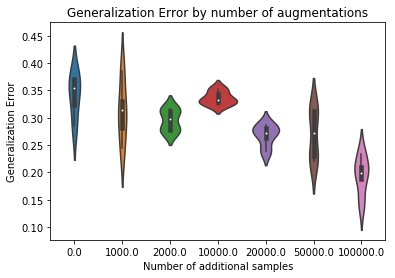

In [209]:
plt.title("\n".join(wrap('Generalization Error by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByNumberAug_v2.png'))

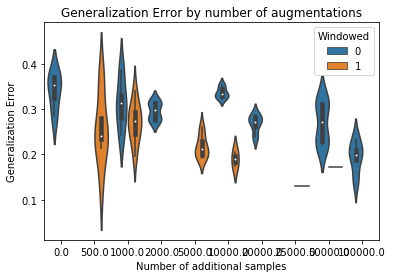

In [49]:
plt.title("\n".join(wrap('Generalization Error by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GenErrorByNumberAugWindowed_v2.png'))

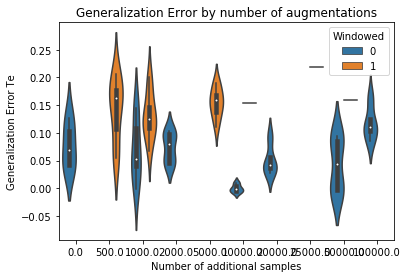

In [50]:
plt.title("\n".join(wrap('Generalization Error by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Generalization Error Te', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GenErrorTeByNumberAugWindowed_v2.png'))

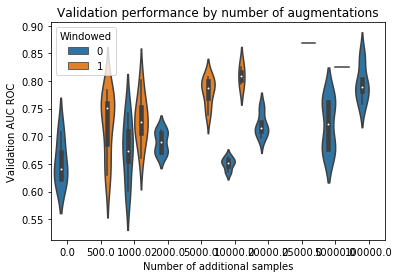

In [46]:
plt.title("\n".join(wrap('Validation performance by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByNumberAugWindowed_v2.png'))

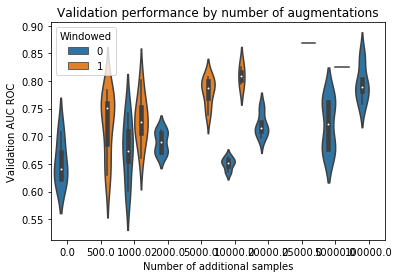

In [45]:
plt.title("\n".join(wrap('Validation performance by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByNumberAugWindowed_v2.png'))

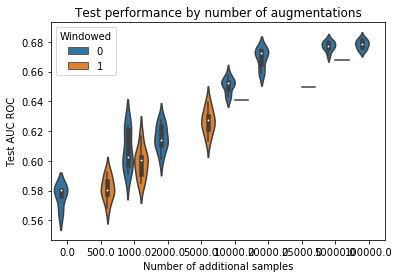

In [44]:
plt.title("\n".join(wrap('Test performance by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByNumberAugWindowed_v2.png'))

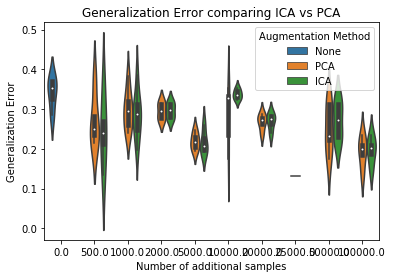

In [61]:
plt.title("\n".join(wrap('Generalization Error comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByDecomp_v2.png'))

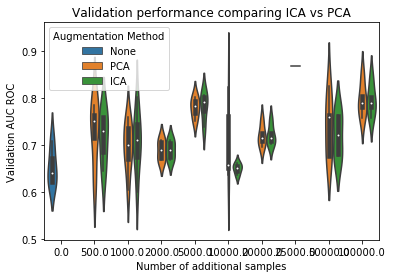

In [62]:
plt.title("\n".join(wrap('Validation performance comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByNumberAug_v2.png'))

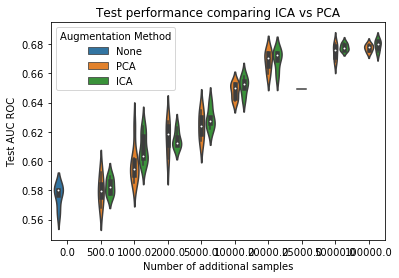

In [63]:
plt.title("\n".join(wrap('Test performance comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByNumberAug_v2.png'))

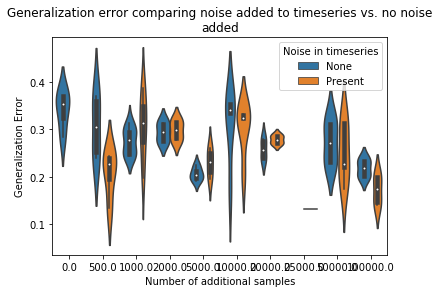

In [64]:
plt.title("\n".join(wrap('Generalization error comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByTimeseriesNoise_v2.png'))

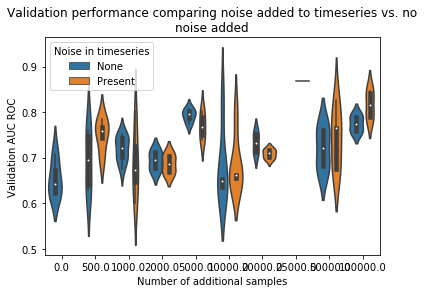

In [65]:
plt.title("\n".join(wrap('Validation performance comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByTimeseriesNoise_v2.png'))

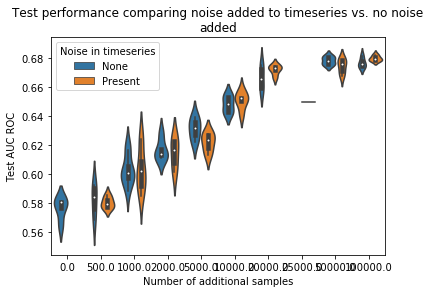

In [66]:
plt.title("\n".join(wrap('Test performance comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByTimeseriesNoise_v2.png'))

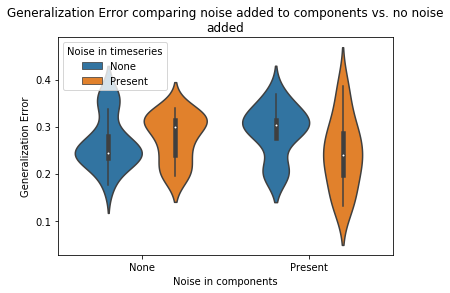

In [71]:
plt.title("\n".join(wrap('Generalization Error comparing noise added to components vs. no noise added')))
sns.violinplot(x='Noise in components', y='Generalization Error', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'NoiseGeneralizationError.png'))

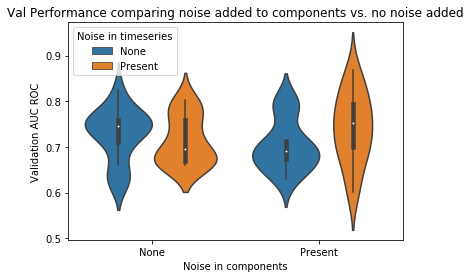

In [74]:
plt.title("\n".join(wrap('Val Performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Noise in components', y='Validation AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'NoiseValidationPerformance.png'))

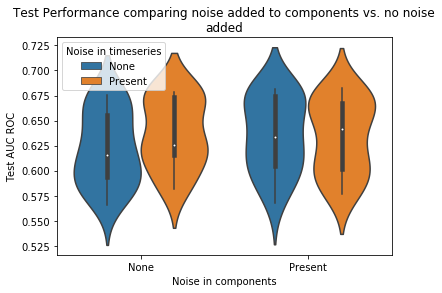

In [75]:
plt.title("\n".join(wrap('Test Performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Noise in components', y='Test AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'NoiseValidationPerformance.png'))

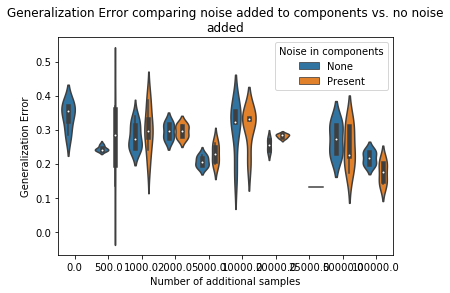

In [67]:
plt.title("\n".join(wrap('Generalization Error comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByComponentNoise_v2.png'))

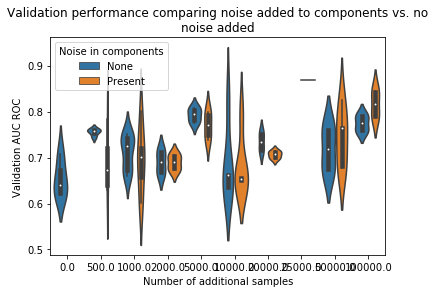

In [68]:
plt.title("\n".join(wrap('Validation performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByComponentNoise_v2.png'))

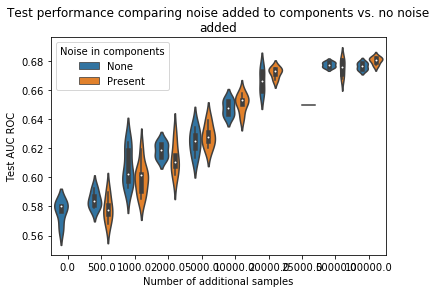

In [69]:
plt.title("\n".join(wrap('Test performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByComponentNoise_v2.png'))

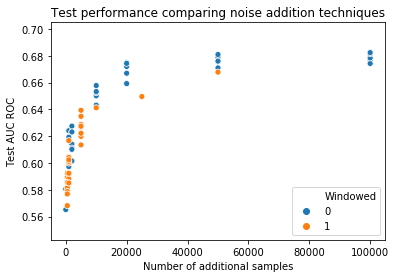

In [51]:
plt.title("\n".join(wrap('Test performance comparing noise addition techniques')))
sns.scatterplot(x='Number of additional samples', y='Test AUC ROC', hue='Windowed', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerformanceByNoiseTechniques_v2.png'))

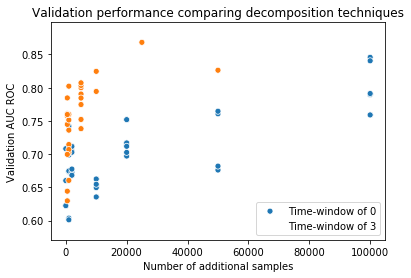

In [57]:
plt.title("\n".join(wrap('Validation performance comparing decomposition techniques')))
sns.scatterplot(x='Number of additional samples', y='Validation AUC ROC', hue='Windowed', data=pdDataAug)
plt.legend(['Time-window of 0', 'Time-window of 3'])
plt.savefig(os.path.join(sRoot, 'Images', 'ValAUCByNumberAug.png'))

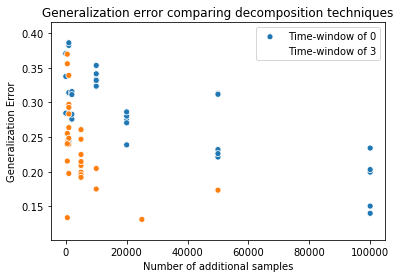

In [56]:
plt.title("\n".join(wrap('Generalization error comparing decomposition techniques')))
sns.scatterplot(x='Number of additional samples', y='Generalization Error', hue='Windowed', data=pdDataAug)
plt.legend(['Time-window of 0', 'Time-window of 3'])
plt.savefig(os.path.join(sRoot, 'Images', 'GenErrorByNumberAug.png'))

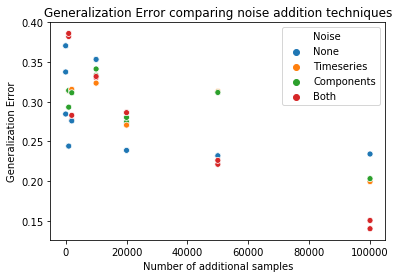

In [218]:
plt.title("\n".join(wrap('Generalization Error comparing noise addition techniques')))
g=sns.scatterplot(x='Number of additional samples', y='Generalization Error', hue='Noise', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByNoiseTechniques_v2.png'))

In [220]:
pdDataAug['Generalization Error Te']=pdDataAug['Validation AUC ROC']-pdDataAug['Test AUC ROC']

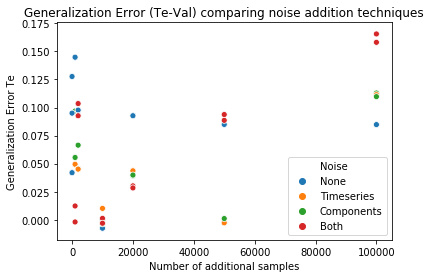

In [221]:
plt.title("\n".join(wrap('Generalization Error (Te-Val) comparing noise addition techniques')))
g=sns.scatterplot(x='Number of additional samples', y='Generalization Error Te', hue='Noise', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorTeByNoiseTechniques_v2.png'))